In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
body = pd.read_csv("data/body.tsv", sep='\t')
body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [6]:
df = body.head(10000)

G = nx.from_pandas_edgelist(df, source="SOURCE_SUBREDDIT", target="TARGET_SUBREDDIT", create_using=nx.MultiDiGraph(), edge_attr=("TIMESTAMP", "LINK_SENTIMENT"))


In [7]:
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 4076\nNumber of edges: 10000\nAverage in degree:   2.4534\nAverage out degree:   2.4534'

In [10]:
positive = [(u,v) for u,v,e in G.edges(data=True) if e["LINK_SENTIMENT"] == 1]
negative = [(u,v) for u,v,e in G.edges(data=True) if e["LINK_SENTIMENT"] == -1]

In [14]:
print(len(positive))
print(len(negative))

9260
740


In [13]:
in_degree = np.array([x[1] for x in G.in_degree()])
out_degree = np.array([x[1] for x in G.out_degree()])

max_in = np.log(in_degree.max()+2)
max_out = np.log(out_degree.max()+2)

a = np.log(in_degree+2)/max_in
b = np.log(out_degree+2)/max_out
colours = list(zip(a, np.zeros(a.shape), b))
#colours = [(np.log(inn+1)/max_in, 0, np.log(out+1)/max_out) for inn, out in zip(in_degree, out_degree)]


In [36]:
G2 = nx.DiGraph()
for u,v,e in G.edges(data=True):
    if G2.has_edge(u,v):
        G2.edges[u,v]["weight"] += e["LINK_SENTIMENT"]
    else:
        G2.add_edge(u,v,weight=0)

In [37]:
nx.info(G2)

'Name: \nType: DiGraph\nNumber of nodes: 4076\nNumber of edges: 7312\nAverage in degree:   1.7939\nAverage out degree:   1.7939'

In [9]:
labels = [(node, "") for node in nx.nodes(G)]
highest_in = np.argpartition(-in_degree, 9)[:10]
highest_out = np.argpartition(-out_degree, 9)[:10]
for i in highest_in:
    labels[i] = (labels[i][0],labels[i][0])
    print(labels[i][0])
print("--------------")
for i in highest_out:
    labels[i] = (labels[i][0],labels[i][0])
    print(labels[i][0])
labels = dict(labels)

askreddit
iama
pics
dogecoin
funny
todayilearned
videos
adviceanimals
worldnews
bitcoin
--------------
dailydot
subredditdrama
askreddit
hailcorporate
france
circlebroke
dogecoin
badhistory
circlejerkcopypasta
iama


In [10]:
layout = nx.spring_layout(G)

In [28]:
sizes = [x^2+y^2+10 for x,y in zip(in_degree, out_degree)]

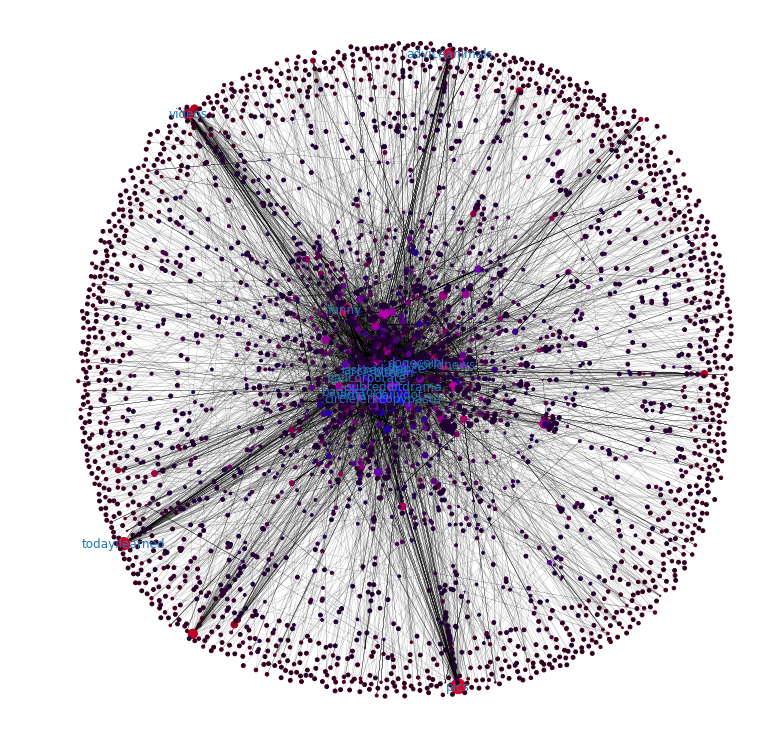

In [30]:
plt.figure(figsize=(10,10))
nx.draw(G, pos=layout, node_size=sizes, arrows=False, node_color=colours, width = 0.1, labels=labels, font_color='C0')

In [40]:
for u, v in nx.edges(G, "circlebroke"):
    print(v)
    print(G.get_edge_data(u,v))

childfree
{'TIMESTAMP': '2014-01-01 06:51:30', 'LINK_SENTIMENT': 1}
science
{'TIMESTAMP': '2014-01-29 14:27:48', 'LINK_SENTIMENT': -1}
environment
{'TIMESTAMP': '2014-01-02 09:50:51', 'LINK_SENTIMENT': 1}
lostgeneration
{'TIMESTAMP': '2014-01-02 13:47:23', 'LINK_SENTIMENT': -1}
funny
{'TIMESTAMP': '2014-03-03 09:38:23', 'LINK_SENTIMENT': -1}
debatereligion
{'TIMESTAMP': '2014-01-06 02:10:41', 'LINK_SENTIMENT': 1}
news
{'TIMESTAMP': '2014-02-27 08:37:11', 'LINK_SENTIMENT': -1}
wtf
{'TIMESTAMP': '2014-03-03 18:41:36', 'LINK_SENTIMENT': -1}
askreddit
{'TIMESTAMP': '2014-03-06 10:13:52', 'LINK_SENTIMENT': -1}
television
{'TIMESTAMP': '2014-03-04 20:22:01', 'LINK_SENTIMENT': -1}
debateachristian
{'TIMESTAMP': '2014-01-06 02:10:41', 'LINK_SENTIMENT': 1}
worldnews
{'TIMESTAMP': '2014-03-03 18:41:36', 'LINK_SENTIMENT': 1}
todayilearned
{'TIMESTAMP': '2014-03-03 09:38:23', 'LINK_SENTIMENT': 1}
seduction
{'TIMESTAMP': '2014-01-07 10:48:11', 'LINK_SENTIMENT': -1}
adviceanimals
{'TIMESTAMP': '2014